In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.stats import gaussian_kde
import warnings
warnings.filterwarnings('ignore')

In [2]:
csv_file_path = '~/baseball-and-stuff/baseball/all_pitches.csv'

df = pd.read_csv(csv_file_path)

/var/folders/l7/wzwhjfv129l1wmlklwpt_j_r0000gn/T/ipykernel_89026/1573860791.py:3: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


In [3]:
df2024 = df[df['game_year'] == 2024]

In [64]:
def plot_heatmap_grid(df, player_name, pitch_type, stand=None):
    player_df = df[df['player_name'] == player_name]
    player_df = player_df[player_df['pitch_type'] == pitch_type]

    if player_df.empty:
        print(f"No data found for player: {player_name}")
        return        

    fig, axs = plt.subplots(4, 3, figsize=(15, 12), sharey=True, sharex=True)
    formatted_player_name = ' '.join(player_name.split(', ')[::-1])

    if stand:
        player_df = player_df[player_df['stand'] == stand]
    fig.suptitle(f'{pitch_type} Location for {formatted_player_name} Against {stand}HH by Count', fontsize=20, fontweight='bold', y=0.96)

    balls = [0, 1, 2, 3]
    strikes = [0, 1, 2]

    xlim = (-3, 3)
    ylim = (0, 5)

    for i, ball in enumerate(balls):
        for j, strike in enumerate(strikes):
            ax = axs[i, j]

            count_df = player_df[(player_df['balls'] == ball) & (player_df['strikes'] == strike)]

            if count_df.empty:
                ax.set_title(f"{ball}-{strike}\n(No Data)")
                ax.axis('off')
                continue

            x_grid = np.linspace(xlim[0], xlim[1], 100)
            y_grid = np.linspace(ylim[0], ylim[1], 100)
            X, Y = np.meshgrid(x_grid, y_grid)

            kde = gaussian_kde(count_df[['plate_x', 'plate_z']].T, bw_method=0.5)
            Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

            ax.imshow(Z, extent=xlim + ylim, origin='lower', cmap='coolwarm', alpha=0.6)

            ax.set_title(f"{ball}-{strike}")

            rectangle = patches.Rectangle((-0.83, 1.3), 1.66, 2.4, linewidth=2, edgecolor='black', facecolor='none')
            ax.add_patch(rectangle)

            pentagon = patches.Polygon(
                [[-0.83, 0.8], [0.83, 0.8], [0.83, 0.5], [0, 0.25], [-0.83, 0.5]], 
                closed=True, linewidth=2, edgecolor='lightgrey', facecolor='lightgrey'
            )
            ax.add_patch(pentagon)

            count = count_df.shape[0]
            ax.annotate(f'n={count}', xy=(1, 4.5), fontsize=10, color='black',
                        bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='white'), 
                        ha='center')

            ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

    plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.1, hspace=0.2, wspace=0)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()

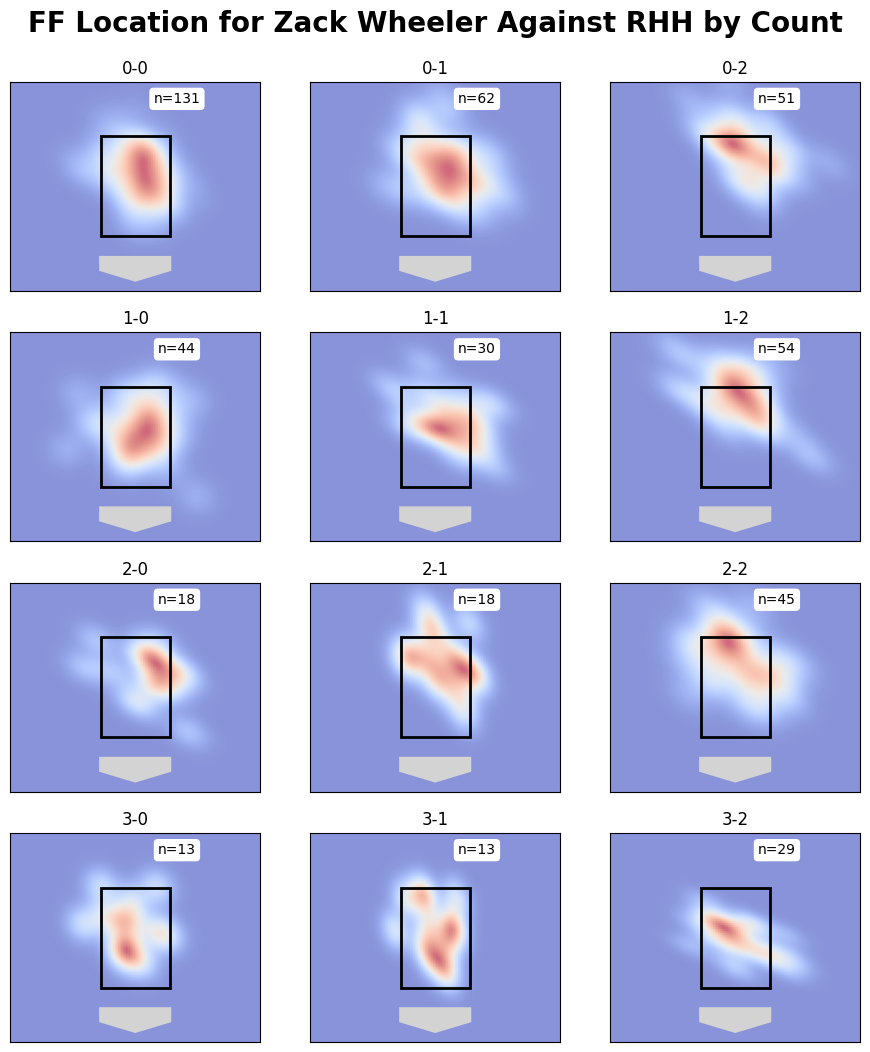

In [66]:
plot_heatmap_grid(df2024, 'Wheeler, Zack', 'FF', 'R')